In [75]:
import geopandas
from shapely.geometry import box, Polygon
from geoplanar import merge_touching

# Merge or remove neighbouring polygons based on a set of conditions

    Merge or remove polygons based on a set of conditions.
    If polygon does not share any boundary with another polygon, remove. If it shares some boundary with
    a neighbouring polygon, join to that polygon. If ``largest=None`` it picks one randomly, otherwise it 
    picks the polygon with which it shares the largest (True) or the smallest (False) boundary.

## Example 1: remove or merge polygons under a certain area threshold

In [2]:
p1 = box(0, 0, 1, 1)
p2 = box(1, 0, 11, 10)
p3 = box(15, 0, 25, 10)
p4 = box(0, 15, 1, 16)
gdf = geopandas.GeoDataFrame(geometry=[p1, p2, p3, p4])
index = [0, 3]

In [3]:
gdf

,geometry
0,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 0...."
1,"POLYGON ((11.00000 0.00000, 11.00000 10.00000,..."
2,"POLYGON ((25.00000 0.00000, 25.00000 10.00000,..."
3,"POLYGON ((1.00000 15.00000, 1.00000 16.00000, ..."


<Axes: >

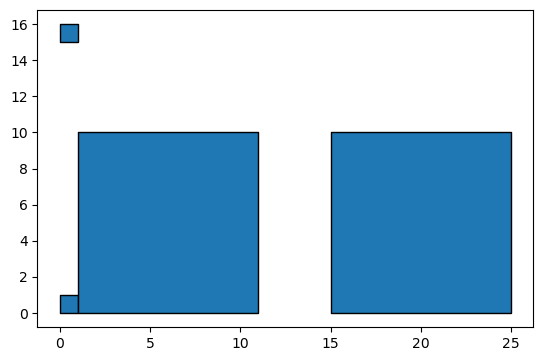

In [4]:
gdf.plot(edgecolor='k')

### Find index of polygons with an area of less than 5

In [17]:
gdf[gdf.area < 5]

,geometry
0,"POLYGON ((1.00000 0.00000, 1.00000 1.00000, 0...."
3,"POLYGON ((1.00000 15.00000, 1.00000 16.00000, ..."


In [14]:
index = gdf[gdf.area < 5].index

In [ ]:
index

In [15]:
gdf1 = merge_touching(gdf,index)

<Axes: >

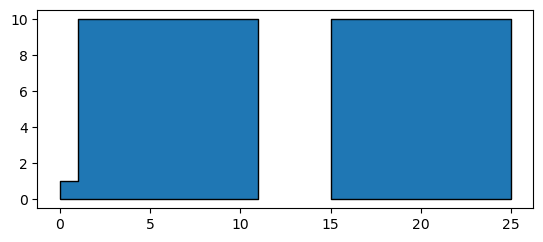

In [7]:
gdf1.plot(edgecolor='k')

### Example 2: remove or merge polygons of shape triangle

In [111]:
p1 = Polygon( [[0, 0], [10,0], [10,10], [0,10] ] )
p2 = Polygon( [(10, -0), (10,-7), (14,-10), (14,0)] )
p3 = Polygon( [(10, 0), (10,5), (15,0)] )
gdf=geopandas.GeoDataFrame(geometry=[p1,p2,p3])

<Axes: >

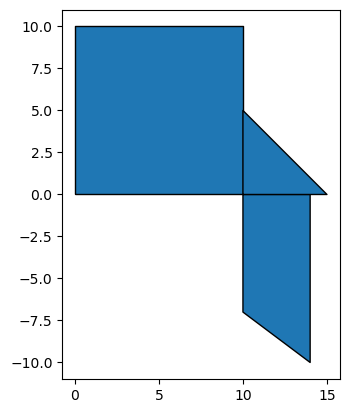

In [112]:
gdf.plot(edgecolor='k')

In [113]:
# triangles have 4 points in their exterior (first and last are the same so that the polygon is closed)
gdf['geometry'].apply(lambda x: len(x.exterior.coords))

0    5
1    5
2    4
Name: geometry, dtype: int64

In [114]:
gdf[gdf['geometry'].apply(lambda x: len(x.exterior.coords)) == 4]

,geometry
2,"POLYGON ((10.00000 0.00000, 10.00000 5.00000, ..."


In [115]:
index = gdf[gdf['geometry'].apply(lambda x: len(x.exterior.coords)) == 4].index

In [116]:
index

Index([2], dtype='int64')

In [117]:
gdf1 = merge_touching(gdf,index)

<Axes: >

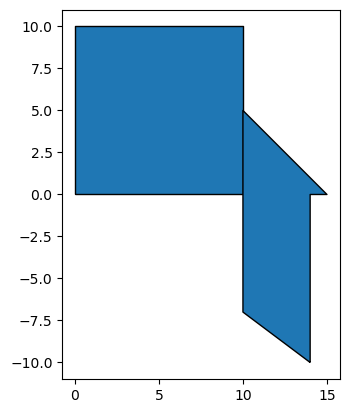

In [118]:
gdf1.plot(edgecolor='k')

Set largest = True to merge with the neighbour with the longest shared boundary

In [121]:
gdf1 = merge_touching(gdf,index,largest=True)

<Axes: >

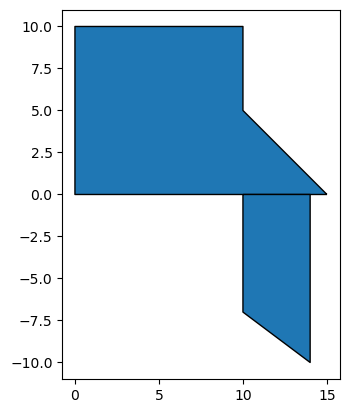

In [122]:
gdf1.plot(edgecolor='k')

In [123]:
gdf1 = merge_touching(gdf,index,largest=False)

<Axes: >

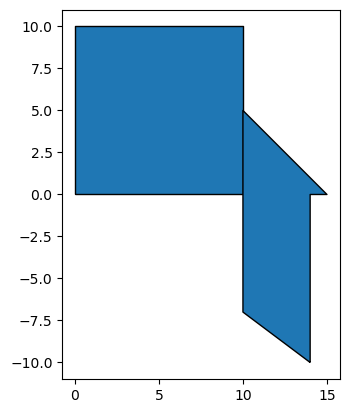

In [124]:
gdf1.plot(edgecolor='k')